
¡Hola, Sebastian!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Sebatian! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

# Proyecto Sprint 8

## Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

In [1]:
#primero importamos las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#cargamos los dataframes
company = pd.read_csv("moved_project_sql_result_01.csv", sep=",")
avg_trips = pd.read_csv("moved_project_sql_result_04.csv", sep=",")
weather = pd.read_csv("moved_project_sql_result_07.csv", sep=",")

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de la información y las librerias necesarias para el análisis. 

## Manipulación de datos

In [3]:
#imprimimos de forma indiviual los dataframes y su informacion para tener una idea de lo que contienen y su tipo de datos.
print(company)
company.info()

                                 company_name  trips_amount
0                                   Flash Cab         19558
1                   Taxi Affiliation Services         11422
2                            Medallion Leasin         10367
3                                  Yellow Cab          9888
4             Taxi Affiliation Service Yellow          9299
..                                        ...           ...
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-nul

In [4]:
#Comprobamos duplicados explicitos.
print(company.duplicated().sum())
print()

#Comprobamos duplicados implicitos de la columna "company_name" que al contener nombres de compañias no deberian repetirse
print(company["company_name"].value_counts().head(15))
print()

#Comprobamos valores unicos de la columna "company_name"
print(company["company_name"].nunique())

0

4053 - 40193 Adwar H. Nikola         1
6743 - 78771 Luhak Corp              1
6742 - 83735 Tasha ride inc          1
Chicago Carriage Cab Corp            1
Metro Jet Taxi A                     1
3620 - 52292 David K. Cab Corp.      1
Chicago Independents                 1
3556 - 36214 RC Andrews Cab          1
5062 - 34841 Sam Mestas              1
Blue Ribbon Taxi Association Inc.    1
KOAM Taxi Association                1
2823 - 73307 Lee Express Inc         1
Yellow Cab                           1
0118 - 42111 Godfrey S.Awir          1
Medallion Leasin                     1
Name: company_name, dtype: int64

64


Vemos que: 
1. El dataframe no tiene valores nulos.
2. Los nombres de las columnas estan en minusculas.
3. Los tipos de los datos son adecuados.
4. El dataframe no contiene duplicados.

In [5]:
#imprimimos de forma indiviual los dataframes y su informacion para tener una idea de lo que contienen y su tipo de datos.
print(avg_trips)
avg_trips.info()

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
#Comprobamos duplicados explicitos.
print(avg_trips.duplicated().sum())
print()

#Comprobamos duplicados implicitos de la columna "dropoff_location_name" que al contener nombres de barrios no deberian repetirse
print(avg_trips["dropoff_location_name"].value_counts().head(15))
print()

#Comprobamos valores unicos de la columna "dropoff_location_name"
print(avg_trips["dropoff_location_name"].nunique())

0

Montclare            1
Wicker Park          1
West Elsdon          1
New City             1
Wrigleyville         1
Little Italy, UIC    1
Near South Side      1
Clearing             1
Hermosa              1
Douglas              1
Albany Park          1
East Village         1
West Loop            1
Morgan Park          1
Hyde Park            1
Name: dropoff_location_name, dtype: int64

94


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el análisis de duplicados

Vemos que: 
1. El dataframe no tiene valores nulos.
2. Los nombres de las columnas estan en minusculas.
3. Los tipos de los datos son adecuados.
4. El dataframe no contiene duplicados.

In [7]:
#imprimimos de forma indiviual los dataframes y su informacion para tener una idea de lo que contienen y su tipo de datos.
print(weather)
weather.info()

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts  

En este ultimo dataframe (weather) podemos ver que la duracion en segundos de los viajes es de tipo flotante. sin embargo, vemos que el campo no esta pensado para que albergue decimas de segundo por lo que seria mejor cambiarlo a tipo entero.

In [8]:
#cambiamos el tipo de dato de la columna "duration_seconds" a int y comprobamos el cambio
weather["duration_seconds"] = weather["duration_seconds"].astype("int")

print(weather)
weather.info()

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good              2410
1     2017-11-25 14:00:00               Good              1920
2     2017-11-25 12:00:00               Good              1543
3     2017-11-04 10:00:00               Good              2512
4     2017-11-11 07:00:00               Good              1440
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good                 0
1064  2017-11-11 10:00:00               Good              1318
1065  2017-11-11 13:00:00               Good              2100
1066  2017-11-11 08:00:00               Good              1380
1067  2017-11-04 16:00:00                Bad              2834

[1068 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts    

In [9]:
#Comprobamos duplicados explicitos.
print(weather.duplicated().sum())
print()

#Comprobamos duplicados implicitos de la columna "start_ts"
print(weather["start_ts"].value_counts().head(15))
print()

#Comprobamos valores unicos de la columna "start_ts"
print(weather["start_ts"].nunique())

197

2017-11-11 10:00:00    48
2017-11-04 14:00:00    46
2017-11-04 12:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
2017-11-04 16:00:00    39
2017-11-11 12:00:00    39
2017-11-11 07:00:00    33
2017-11-11 14:00:00    33
2017-11-11 16:00:00    32
2017-11-04 10:00:00    30
2017-11-11 11:00:00    29
2017-11-18 12:00:00    26
2017-11-04 06:00:00    26
2017-11-04 08:00:00    25
Name: start_ts, dtype: int64

81


Vemos que: 
1. El dataframe no tiene valores nulos.
2. Los nombres de las columnas estan en minusculas.
3. Los tipos de los datos ahora son adecuados.
4. El dataframe contiene muchos valores duplicados. Pero al tratarse de horas solo indicaria que en ciertos horarios hay mas servicios que en otras.

Ahora que sabemos que los dataframes estan bien podemos continuar.

## Análisis de datos

### Principales compañias de taxi

In [10]:
#primero ordenamos de mayor a menos
company = company.sort_values(by="trips_amount", ascending=False)

#extraemos las primeras 10 compañias
company_top_10 = company.head(10)

#extraemos todas las demas compañias
other = company.iloc[10:]

#sumamos la cantidad de viajes
other_sum = other["trips_amount"].sum()

#creamos un DataFrame nuevo que contenga las mismas columnas que "company" pero con una fila que se llame other y la suma de las compañias que no entraron al top 10
other_total = pd.DataFrame([{'company_name': 'other', 'trips_amount': other_sum}])

#ahora como ambos DataFrames tienen las mismas columnas sumplemente las concatenamos
company_chart = pd.concat([company_top_10, other_total])


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
0                              other         38039

Total de viajes: 137311

Total de compañias: 64


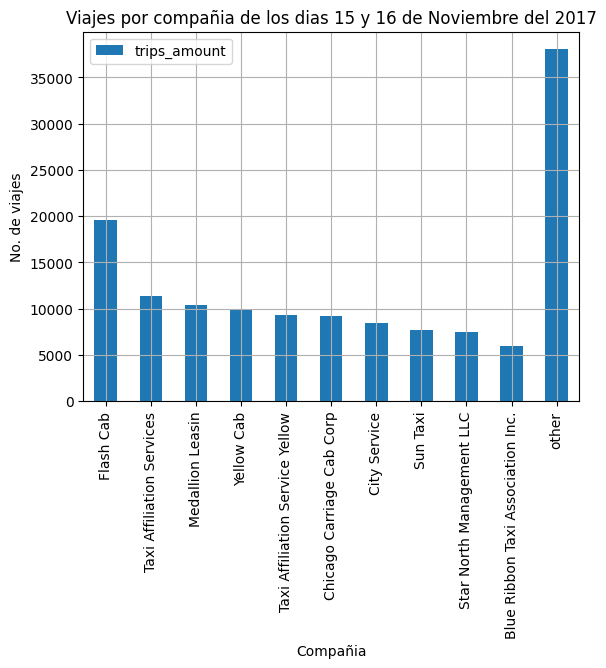

In [11]:
#imprimimos los el DataFrame para ver la cantidad de viajes, asi como el total y el conteo de empresas ya que son datos importantes
print(company_chart)
print()
print("Total de viajes: {}".format(company_chart["trips_amount"].sum()))
print()
print("Total de compañias: {}".format(company["company_name"].count()))


#mostramos una grafica de barras para comparar dichas cantidades
company_chart.plot(kind="bar",
        y="trips_amount",
        x="company_name", 
        grid=True)

plt.title("Viajes por compañia de los dias 15 y 16 de Noviembre del 2017")
plt.xlabel("Compañia")
plt.ylabel("No. de viajes")

plt.show()

#### Conclusion

La compañia de taxis con mas viajes en los dias 15 y 16 de noviembre del 2017 fue Flash Cab, con cerca de veinte mil viajes. Seguido por Taxi Affiliation Services con algo mas de la mitad de viajes que los del primer puesto. Las otras compañias van decreciendo en numero de viajes de forma lineal con respecto al segundo puesto. Todas las demas compañias en conjunto obtuvieron un total de 38039 viajes. Son un total de 64 compañias diferentes.

Podriamos concluir lo siguiente:


1. Flash Cab es el competidor mas fuerte con diferencia.
2. El 16% de la compañias (las 10 que aparecen en la tabla) se reparten el 72% del total de viajes realizados, lo cual cumple con la Ley de Pareto.
3. Esto ultimo indicaria que hay muchas compañias que podrian ser desplazadas facilmente por las mas grandes.
4. El taxi es un gran negocio en Chicago.

### Destinos preferidos por los usuarios

In [12]:
#primero ordenamos de mayor a menos
avg_trips = avg_trips.sort_values(by="average_trips", ascending=False)

#extraemos los 10 destinos mas importantes
trips_top_10 = avg_trips.head(10)

#extraemos todas los otros destinos
other_trips = avg_trips.iloc[10:]

#en este caso sacamos la mediana pues los valores tienen un sesgo positivo
other_trips_avg = other_trips["average_trips"].median()

#creamos un DataFrame nuevo que contenga las mismas columnas que "avg_trips" pero con una fila que se llame other y la mediana de los destinos que no entraron al top 10
other_trips_total = pd.DataFrame([{'dropoff_location_name': 'other', 'average_trips': other_trips_avg}])

#ahora como ambos DataFrames tienen las mismas columnas sumplemente las concatenamos
average_trips_chart = pd.concat([trips_top_10, other_trips_total])

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]

media: 156.4974259907323
mediana: 34.98333333333333

Destinos diferentes: 94


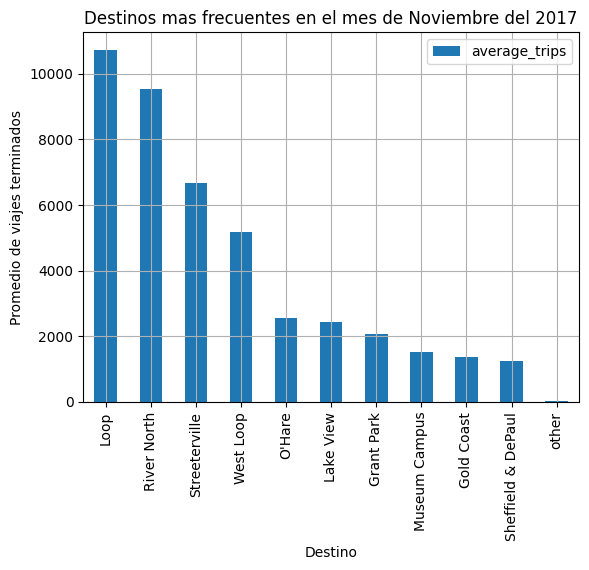

In [13]:
#imprimimos los el DataFrame para ver el promedio de viajes, asi como el numero de destinos y la media y mediana de los destinos que no entraron al top.
print(avg_trips)
print()
print("media: {}".format(other_trips["average_trips"].mean()))
print("mediana: {}".format(other_trips["average_trips"].median()))
print()
print("Destinos diferentes: {}".format(avg_trips["dropoff_location_name"].count()))


#mostramos la grafica
average_trips_chart.plot(kind="bar",
        y="average_trips",
        x="dropoff_location_name", 
        grid=True)

plt.title("Destinos mas frecuentes en el mes de Noviembre del 2017")
plt.xlabel("Destino")
plt.ylabel("Promedio de viajes terminados")

plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de realizar las gráficas para mostrar los resultados. Además, aporta mucho al análisi agrupar en otros a los que no entran en top para comparar con el resto

#### conclusion

El principal destino es Loop que es el centro de Chicago o dicho de otro modo es el Down town, donde estan los edificios de oficinas, tiendas y restaurantes. Los siguientes destinos River North, Streeterville y West Loop son barrios colindantes a Loop, de hecho son los barrios que lo rodean. Y el quinto destino O'Hare es el aeropuerto de Chicago. 

Podriamos concluir lo siguiente:


1. Viendo los destinos podriamos decir que mucha gente toma el taxi para ir a su trabajo.
2. La mayoria de los viajes van al centro de la ciudad.

## Prueba de Hipotesis

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

Hipotesis Nula:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos 
(Las medias poblacionales son iguales).

Hipotesis Alternativa:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos 
(Las medias poblacionales son diferentes).

En este caso al querer comprobar si dos promedios son iguales haremos una prueba de hipotesis de dos colas, en donde vamos a utilizar un umbral de signifacacion estadistica comun de 5%.

In [14]:
#Vemos el DataFrame para saber que contiene
print(weather)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good              2410
1     2017-11-25 14:00:00               Good              1920
2     2017-11-25 12:00:00               Good              1543
3     2017-11-04 10:00:00               Good              2512
4     2017-11-11 07:00:00               Good              1440
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good                 0
1064  2017-11-11 10:00:00               Good              1318
1065  2017-11-11 13:00:00               Good              2100
1066  2017-11-11 08:00:00               Good              1380
1067  2017-11-04 16:00:00                Bad              2834

[1068 rows x 3 columns]


In [15]:
#primero filtramos la columna "weather_condition" por good
weather_good = weather[weather["weather_conditions"] == "Good"]
print(weather_good)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good              2410
1     2017-11-25 14:00:00               Good              1920
2     2017-11-25 12:00:00               Good              1543
3     2017-11-04 10:00:00               Good              2512
4     2017-11-11 07:00:00               Good              1440
...                   ...                ...               ...
1062  2017-11-11 06:00:00               Good              1500
1063  2017-11-25 11:00:00               Good                 0
1064  2017-11-11 10:00:00               Good              1318
1065  2017-11-11 13:00:00               Good              2100
1066  2017-11-11 08:00:00               Good              1380

[888 rows x 3 columns]


In [16]:
#Como vemos hay un valor de 0 segundos, vamos a ver si hay mas
print(weather_good.sort_values(by="duration_seconds", ascending=True))

                 start_ts weather_conditions  duration_seconds
168   2017-11-11 07:00:00               Good                 0
801   2017-11-04 09:00:00               Good                 0
552   2017-11-04 01:00:00               Good                 0
1063  2017-11-25 11:00:00               Good                 0
163   2017-11-11 09:00:00               Good                 0
...                   ...                ...               ...
646   2017-11-11 13:00:00               Good              4380
79    2017-11-11 15:00:00               Good              4800
583   2017-11-11 16:00:00               Good              4980
619   2017-11-25 14:00:00               Good              6420
354   2017-11-25 11:00:00               Good              7440

[888 rows x 3 columns]


In [17]:
#ponemos una condicion para dejar solo las filas que tengan un valor mayor a 0 segundos
weather_good = weather_good[weather_good["duration_seconds"] > 0]


#volvemos a verificar el dataframe
print(weather_good.sort_values(by="duration_seconds", ascending=True))

                start_ts weather_conditions  duration_seconds
15   2017-11-25 13:00:00               Good                60
424  2017-11-11 13:00:00               Good               420
874  2017-11-04 05:00:00               Good              1018
194  2017-11-04 06:00:00               Good              1020
713  2017-11-11 08:00:00               Good              1063
..                   ...                ...               ...
646  2017-11-11 13:00:00               Good              4380
79   2017-11-11 15:00:00               Good              4800
583  2017-11-11 16:00:00               Good              4980
619  2017-11-25 14:00:00               Good              6420
354  2017-11-25 11:00:00               Good              7440

[882 rows x 3 columns]


In [18]:
#luego filtramos la columna "weather_condition" por bad
weather_bad = weather[weather["weather_conditions"] == "Bad"]
print(weather_bad)

                 start_ts weather_conditions  duration_seconds
6     2017-11-04 16:00:00                Bad              2969
30    2017-11-18 12:00:00                Bad              1980
34    2017-11-04 17:00:00                Bad              2460
51    2017-11-04 16:00:00                Bad              2760
52    2017-11-18 12:00:00                Bad              2460
...                   ...                ...               ...
1031  2017-11-18 12:00:00                Bad              2560
1032  2017-11-18 10:00:00                Bad              1908
1053  2017-11-18 12:00:00                Bad              2400
1061  2017-11-18 16:00:00                Bad              2186
1067  2017-11-04 16:00:00                Bad              2834

[180 rows x 3 columns]


In [19]:
#No vimos un valor en 0 en la informacion de dataframe, pero igual lo comprobamos
print(weather_bad.sort_values(by="duration_seconds", ascending=True))

                 start_ts weather_conditions  duration_seconds
203   2017-11-18 00:00:00                Bad               480
860   2017-11-04 18:00:00                Bad               480
743   2017-11-18 07:00:00                Bad              1182
628   2017-11-18 07:00:00                Bad              1200
1000  2017-11-18 08:00:00                Bad              1200
...                   ...                ...               ...
719   2017-11-18 12:00:00                Bad              3600
905   2017-11-18 13:00:00                Bad              3720
788   2017-11-18 13:00:00                Bad              3779
110   2017-11-18 13:00:00                Bad              4044
276   2017-11-18 12:00:00                Bad              4980

[180 rows x 3 columns]


In [20]:
#Vemos que hay mas filas en el DataFrame "weather_good", por lo que vamos a tener que sacar una muestra para igualar las filas.
weather_good_sample = weather_good.sample(n=180, random_state=1)

print(weather_good_sample)

                 start_ts weather_conditions  duration_seconds
3     2017-11-04 10:00:00               Good              2512
624   2017-11-11 08:00:00               Good              1740
306   2017-11-18 06:00:00               Good              1201
974   2017-11-04 12:00:00               Good              3000
1048  2017-11-11 17:00:00               Good              2280
...                   ...                ...               ...
829   2017-11-11 10:00:00               Good              1440
825   2017-11-11 12:00:00               Good              2160
214   2017-11-11 16:00:00               Good              2940
391   2017-11-25 12:00:00               Good              1500
316   2017-11-11 05:00:00               Good              1386

[180 rows x 3 columns]


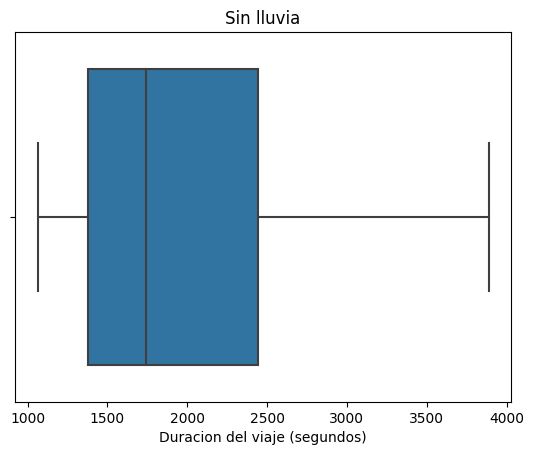

In [21]:
#Hacemos un grafico de caja para cada DataFrame para ver si la varianza es igual
sns.boxplot(data=weather_good_sample, x="duration_seconds")

plt.title("Sin lluvia")
plt.xlabel("Duracion del viaje (segundos)")
plt.show()

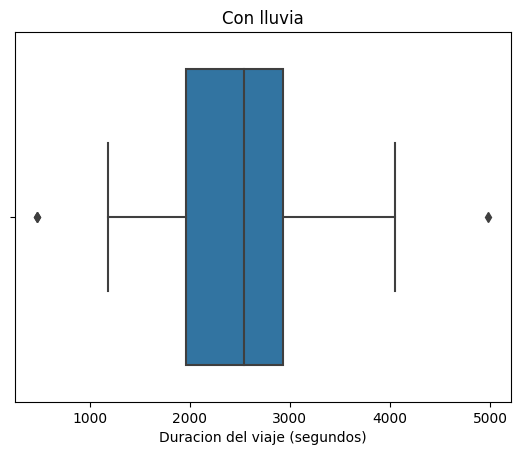

In [22]:
sns.boxplot(data=weather_bad, x="duration_seconds")

plt.title("Con lluvia")
plt.xlabel("Duracion del viaje (segundos)")
plt.show()

Los graficos indican que la varianza de ambos DataFrames son diferentes entre si. Aun asi, se va a comprobar la diferencia mediante el test de Levente.

In [23]:
#Test de Levene
alpha_levene = 0.05

levene = st.levene(weather_good_sample["duration_seconds"], weather_bad["duration_seconds"])

print('valor p: ', levene.pvalue)
print()

if (levene.pvalue < alpha_levene):
    print("Las varianzas son iguales")
else:
    print("Las varianzas son diferentes, se debe colocar el parametro \"equal_var=False\" en el t-test")

valor p:  0.8391884580712593

Las varianzas son diferentes, se debe colocar el parametro "equal_var=False" en el t-test


In [24]:
#Ahora hacemos el analisis estadistico
alpha = 0.05

result = st.ttest_ind(weather_good_sample["duration_seconds"], weather_bad["duration_seconds"], equal_var=False )

print('valor p: ', result.pvalue)
print()

if (result.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  5.684022036950199e-09

Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de desarrollar la prueba de hipótesis. Además, lo complementas con la prueba de levene para mostrar el supuesto de varianzas iguales. 

### Veredicto de la Hipotesis

El resultado rechaza la hipotesis nula. Por lo tanto hay evidencia de que la duracion del viaje cambia si el clima es favorable o no.

## Conclusion General

Despues de analizar los 3 DataFrames podemos concluir lo siguiente:


1. Flash Cab es la compañia de taxi mas grande de Chicago.
2. El taxi es un buen negocio en Chicago.
3. La gente acostumbra toma el taxi para ir a su trabajo.
4. La mayoria de los viajes van al centro de la ciudad o al aeropuerto.
5. El clima afecta al tiempo de traslado, seguramente porque el trafico aumenta en los dias lluviosos.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Sebastian, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    